In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import timedelta
# if using a Jupyter notebook, includue:
%matplotlib inline

import sys
#!{sys.executable} -m pip install selenium

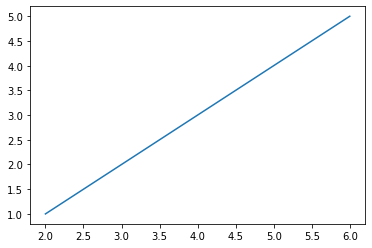

In [2]:
# Line graph
x = [2, 4, 6]
y = [1, 3, 5]
plt.plot(x, y)
plt.show()

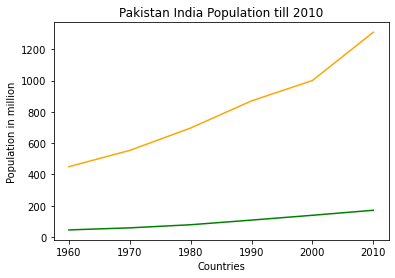

In [3]:
# Example
year = [1960, 1970, 1980, 1990, 2000, 2010]
pop_pakistan = [44.91, 58.09, 78.07, 107.7, 138.5, 170.6]
pop_india = [449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1]
plt.plot(year, pop_pakistan, color='g')
plt.plot(year, pop_india, color='orange')
plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Pakistan India Population till 2010')
plt.show()

In [4]:
#Histogram
mu = 80
sigma = 7
x = np.random.normal(mu, sigma, size=200)

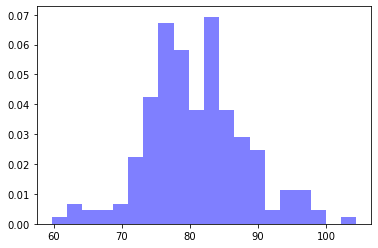

In [5]:
plt.hist(x, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

In [6]:
commute_times = [23, 25, 40, 35, 36, 47, 33, 28, 48, 34,
                 20, 37, 36, 23, 33, 36, 20, 27, 50, 34,
                 47, 18, 28, 52, 21, 44, 34, 13, 40, 49]

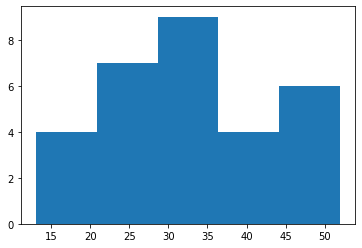

In [7]:
plt.hist(commute_times, 5)

plt.show()

In [8]:
#Bar Graph
aluminum = np.array([6.4e-5, 3.01e-5, 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5,3.6e-5])
copper = np.array([4.5e-5, 1.97e-5, 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5, 1.85e-5,3.3e-5])
steel = np.array([3.3e-5, 1.2e-5, 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5,2.1e-5])

In [9]:
# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

In [10]:
# Create arrays for the plot
materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
CTEs = [aluminum_mean, copper_mean, steel_mean]

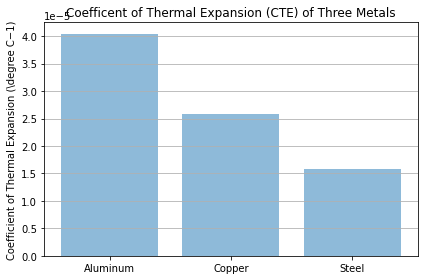

In [11]:
# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Coefficient of Thermal Expansion (\degree C−1)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()

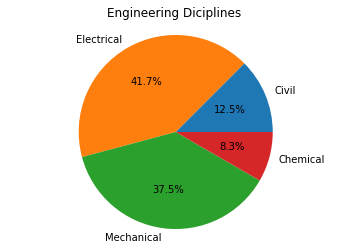

In [12]:
#Pie Chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Civil', 'Electrical', 'Mechanical', 'Chemical']
sizes = [15, 50, 45, 10]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Diciplines')


plt.show()

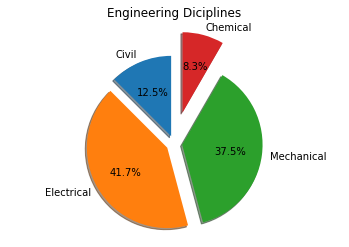

In [13]:
# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.1, 0.1, 0.4)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Engineering Diciplines')


plt.show()

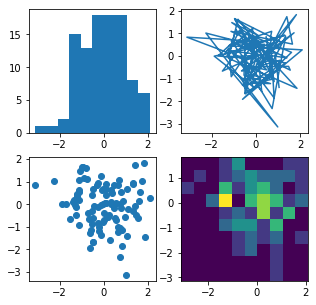

In [14]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

(23814, 5)

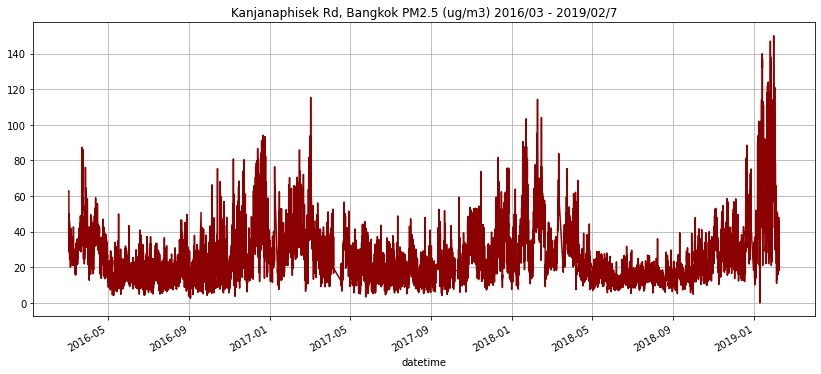

In [15]:
df = pd.read_csv('kanjanaphisek_bangkok_pm25.csv')
df.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df.index = df['datetime']
df.Hour = df.index.hour # UTC hour to UTC+7
df.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
df['PM2.5'].plot(figsize=(14,6),title="Kanjanaphisek Rd, Bangkok PM2.5 (ug/m3) 2016/03 - 2019/02/7", color='darkred', grid=True)
df.shape

<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)'}, xlabel='datetime'>

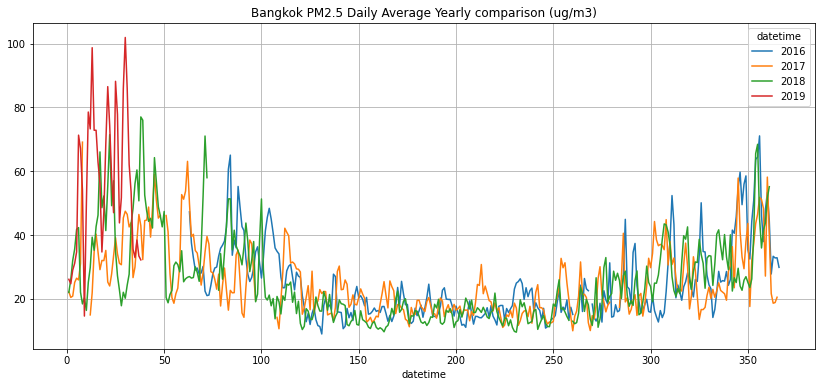

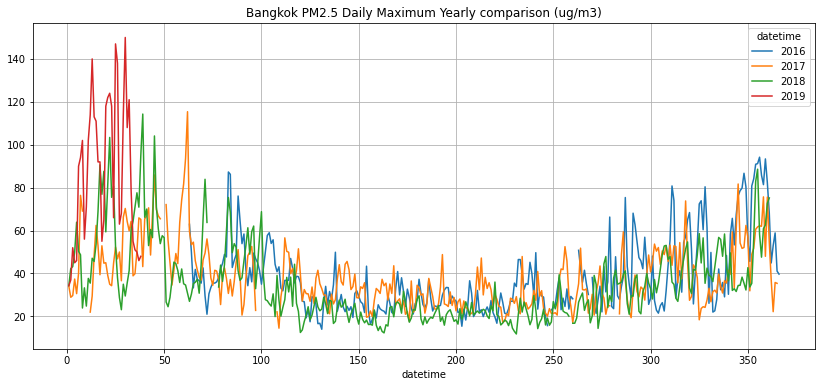

In [16]:
pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                    values='PM2.5', aggfunc='mean')
pv.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,
                    values='PM2.5', aggfunc='max')
pv2.plot(title="Bangkok PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

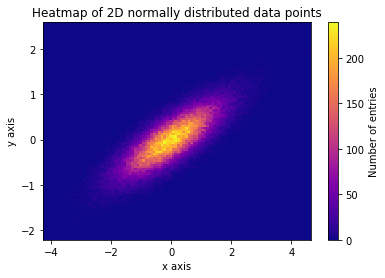

In [17]:
#Heat Map
# Define numbers of generated data points and bins per axis.
N_numbers = 100000
N_bins = 100

# set random seed 
np.random.seed(0)

# Generate 2D normally distributed numbers.
x, y = np.random.multivariate_normal(
        mean=[0.0, 0.0],      # mean
        cov=[[1.0, 0.4],
             [0.4, 0.25]],    # covariance matrix
        size=N_numbers
        ).T                   # transpose to get columns


# Construct 2D histogram from data using the 'plasma' colormap
plt.hist2d(x, y, bins=N_bins, density=False, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('Heatmap of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Show the plot.
plt.show()

In [18]:
from mpl_toolkits.mplot3d import Axes3D

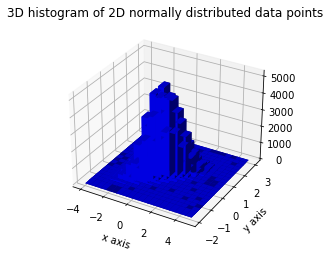

In [19]:
#3D Histogram
# Define numbers of generated data points and bins per axis.
N_numbers = 100000
N_bins = 20

# set random seed 
np.random.seed(0)

# Generate 2D normally distributed numbers.
x, y = np.random.multivariate_normal(
        mean=[0.0, 0.0],      # mean
        cov=[[1.0, 0.4],
             [0.4, 0.25]],    # covariance matrix
        size=N_numbers
        ).T                   # transpose to get columns

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=N_bins)

# Add title and labels to plot.
plt.title('3D histogram of 2D normally distributed data points')
plt.xlabel('x axis')
plt.ylabel('y axis')

# Construct arrays for the anchor positions of the bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# Show the plot.
plt.show()

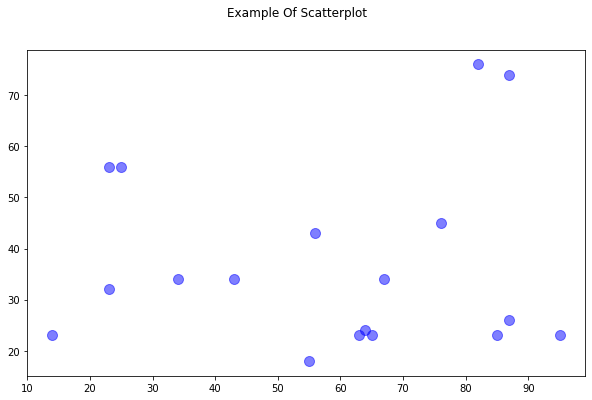

In [20]:
#Scatter Plots

# Data
x = [43,76,34,63,56,82,87,55,64,87,95,23,14,65,67,25,23,85]
y = [34,45,34,23,43,76,26,18,24,74,23,56,23,23,34,56,32,23]

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Example Of Scatterplot')

# Create the Scatter Plot
ax.scatter(x, y,
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

# Show the plot
plt.show()

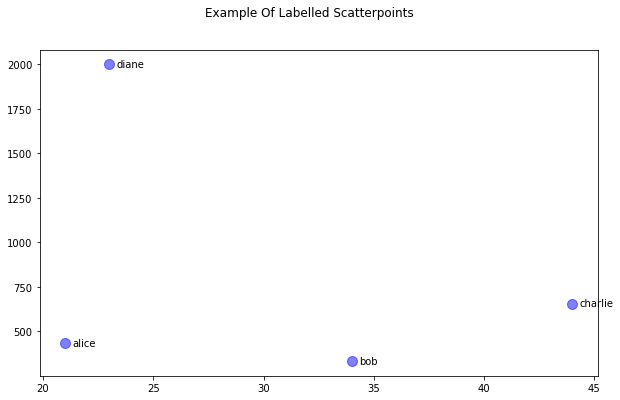

In [21]:
#Scatter Plot with labels
# Data
x = [21, 34, 44, 23]
y = [435, 334, 656, 1999]
labels = ["alice", "bob", "charlie", "diane"]

# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Example Of Labelled Scatterpoints')

# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered

# Show the plot
plt.show()

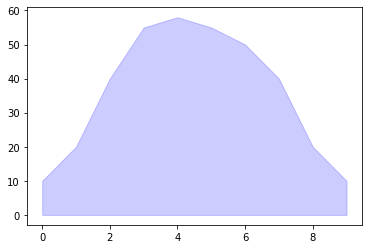

In [22]:
#Shaded Plot
# Data
x =  [0,1,2,3,4,5,6,7,8,9]
y1 = [10,20,40,55,58,55,50,40,20,10]

# Shade the area between y1 and line y=0
plt.fill_between(x, y1, 0,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Show the plot
plt.show()

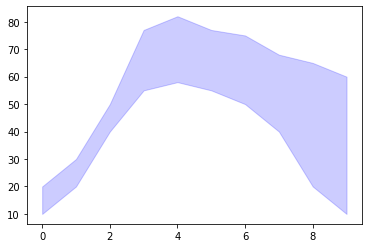

In [23]:
#Shaded Plot between two lines
# Data
x =  [0,1,2,3,4,5,6,7,8,9]
y1 = [10,20,40,55,58,55,50,40,20,10]
y2 = [20,30,50,77,82,77,75,68,65,60]

# Shade the area between y1 and y2
plt.fill_between(x, y1, y2,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill

# Show the plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


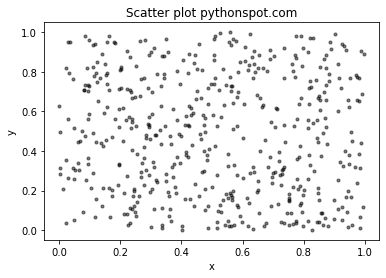

In [24]:
#Scatter Plot
# Create data
N = 500
x = np.random.rand(N)
y = np.random.rand(N)
colors = (0,0,0)
area = np.pi*3

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
plt.style.use('seaborn-whitegrid')

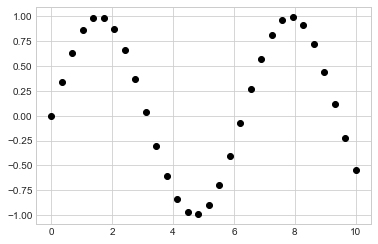

In [26]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

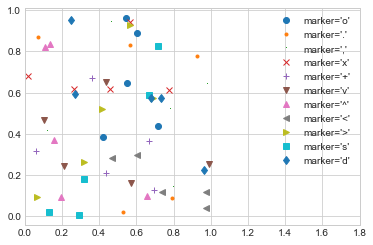

In [27]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

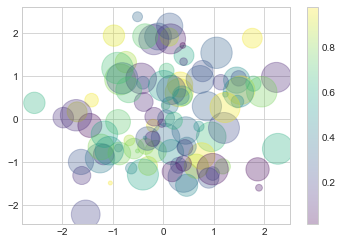

In [28]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

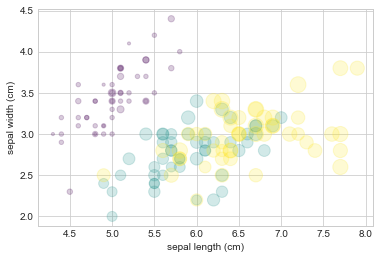

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [30]:
#3D Scatter Plots
from mpl_toolkits import mplot3d

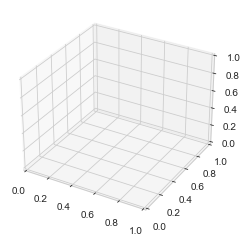

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')

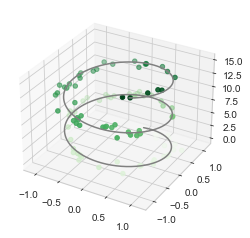

In [32]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [33]:
#3D surface plot
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

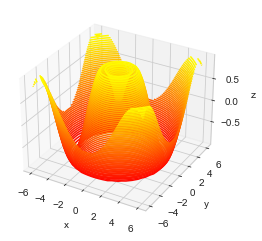

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='autumn')
#binary,summer,afmhot, gist_heat, copper
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

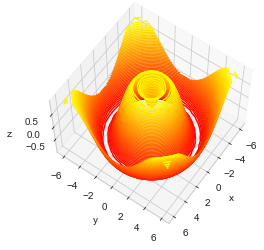

In [35]:
ax.view_init(60, 35)
fig

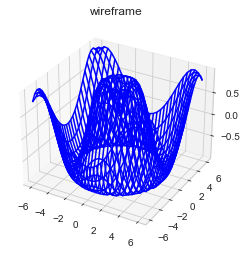

In [36]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='blue')
ax.set_title('wireframe');

In [37]:
#Word cloud
import random

from wordcloud import WordCloud, STOPWORDS

In [38]:
# opening and reading a file
# make sure the path for the file is correct
file1 = open("newsarticle.txt")
file=file1.read()
file1.close()

In [39]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
top_N = 100

In [41]:
import re
from nltk.corpus import stopwords
b = re.sub('[^A-Za-z]+', ' ', file)
nltk.download('stopwords')
#remove all the stopwords from the text
stop_words = list(stopwords.words('english'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


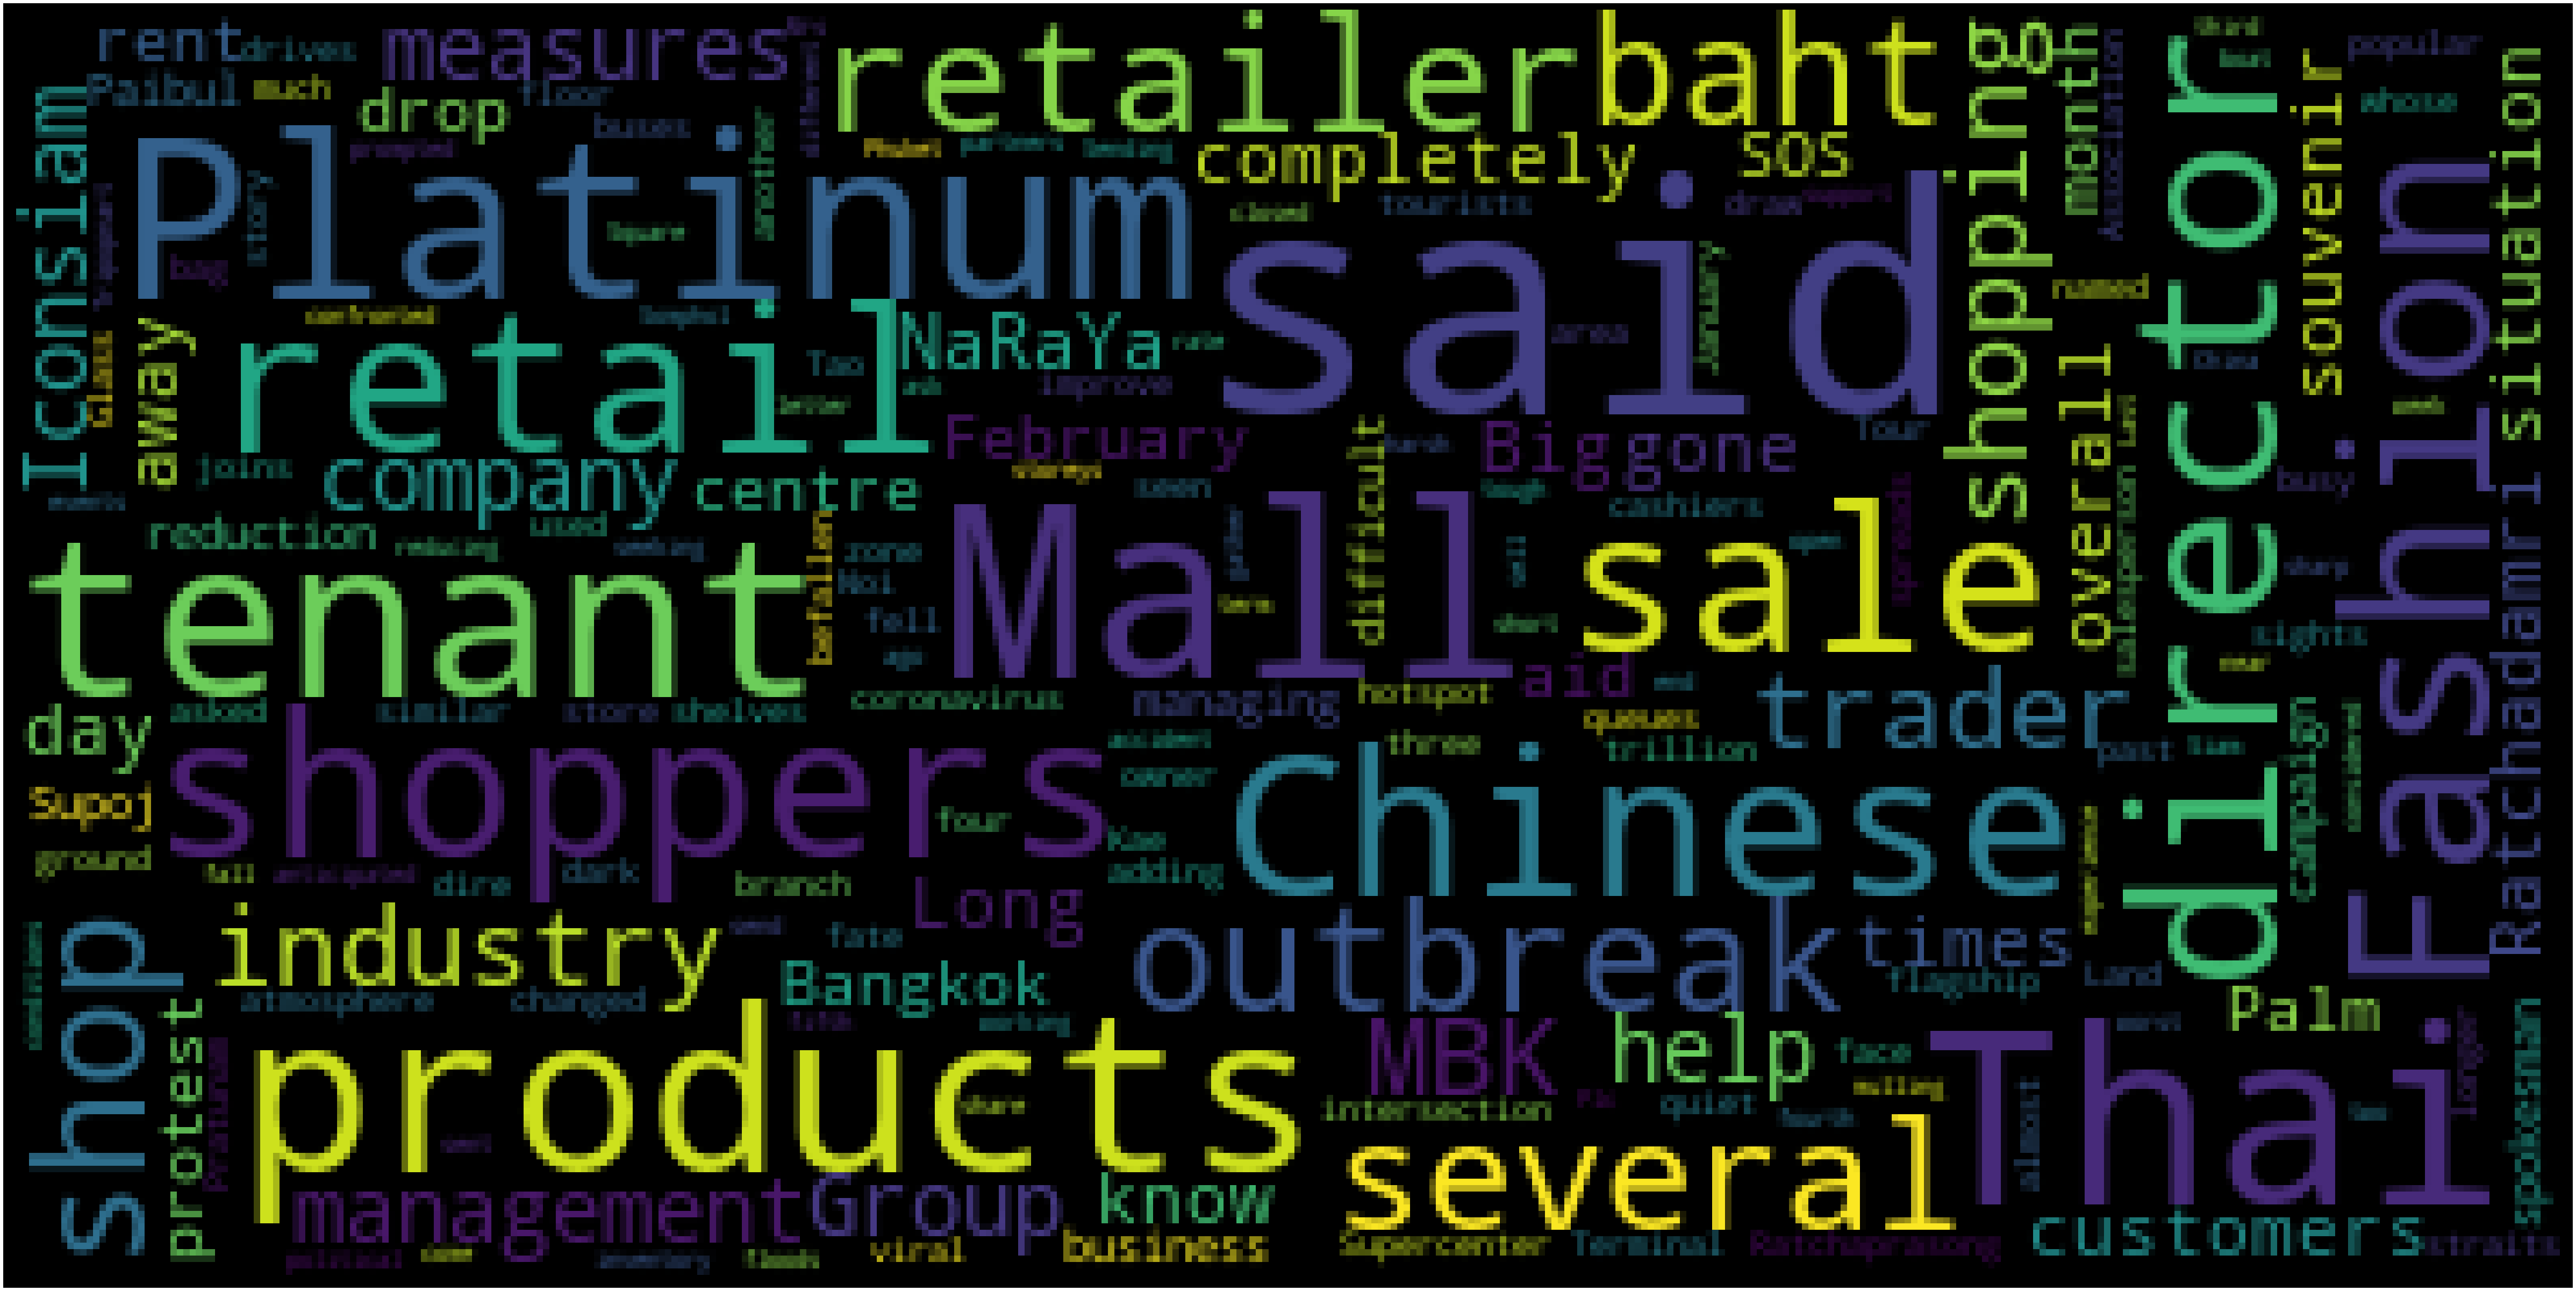

In [42]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()] 
wc(cleaned_data_title,'black','Common Words' )

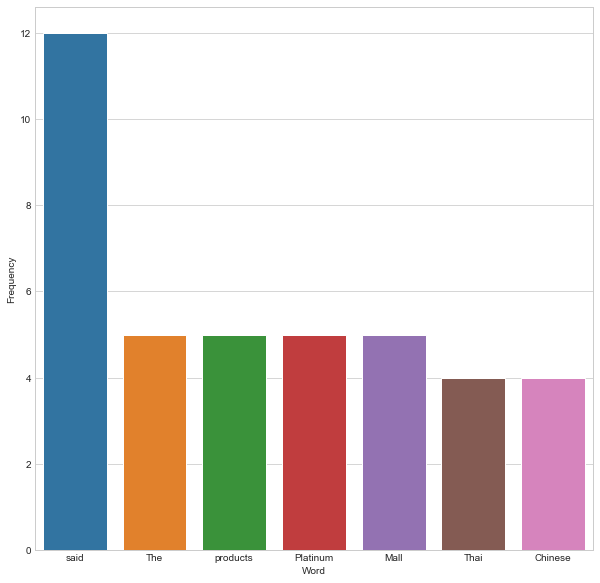

In [43]:
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [44]:
#Box Plot
import itertools as it

maxScatter = 200

In [45]:
sampleCount=int(input("Number of samples:"))

Number of samples: 20


In [46]:
level1Count=int(input("Top Level Unique Values:"))
level2Count=int(input("Second Level Unique Values:"))

Top Level Unique Values: 20
Second Level Unique Values: 20


In [47]:
level1 = ["Level1-{}".format(i) for i in range(level1Count)]
level2 = ["Level2-{}".format(i) for i in range(level2Count)]

In [48]:
def genRandomChoice(l, size):
    for _ in range(size):
        yield random.choice(l)

In [49]:
def genRandInt(s,e,size):
    for _ in range(size):
        yield random.randint(s,e)

In [50]:
querytime = pd.DataFrame({'level1':list(genRandomChoice(level1,sampleCount)),'level2':list(genRandomChoice(level2,sampleCount)),'responseMS':list(genRandInt(5,5000,sampleCount))})

In [51]:
querytime.sample(3)

,level1,level2,responseMS
13,Level1-16,Level2-8,2961
2,Level1-0,Level2-1,4380
0,Level1-4,Level2-7,2764


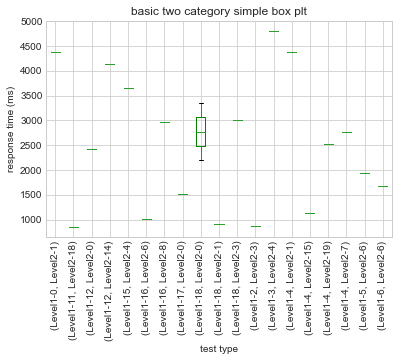

In [52]:
querytime.boxplot(by=['level1','level2'],rot=90,boxprops=dict(color='green'))
plt.title("basic two category simple box plt")
plt.suptitle("")
plt.xlabel("test type")
plt.ylabel("response time (ms)")
plt.show()

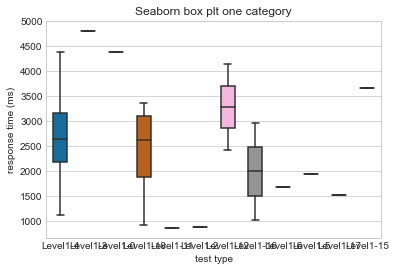

In [53]:
sns.boxplot(y='responseMS', x='level1', 
                 data=querytime, 
                 width=0.5,
                 palette="colorblind")
plt.title("Seaborn box plt one category")
plt.suptitle("")
plt.xlabel("test type")
plt.ylabel("response time (ms)")
plt.show()

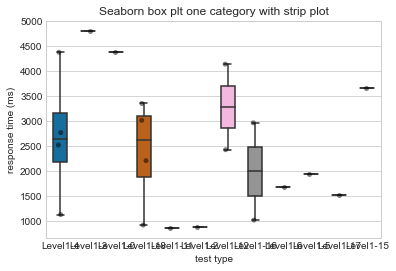

In [54]:
sboxplot = sns.boxplot(y='responseMS', x='level1', 
                 data=querytime, 
                 width=0.5,
                 palette="colorblind")

#if there are too many points, then don't bother with the scatter.  It'll be saturated.
if(len(querytime) <= maxScatter):
    # add stripplot to boxplot with Seaborn
    sboxplot=sns.stripplot(y='responseMS', x='level1', 
                       data=querytime, 
                       jitter=True, 
                       marker='o', 
                       alpha=0.5,
                       color='black')
    
plt.title("Seaborn box plt one category with strip plot")
plt.suptitle("")
plt.xlabel("test type")
plt.ylabel("response time (ms)")
plt.show()

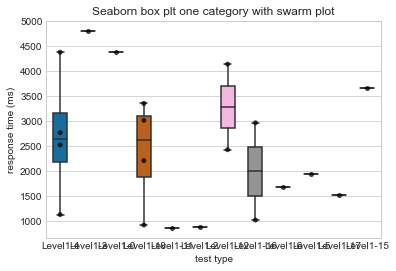

In [55]:
# plot boxplot with seaborn
bplot=sns.boxplot(y='responseMS', x='level1', 
                 data=querytime, 
                 width=0.5,
                 palette="colorblind")
if(len(querytime) <= maxScatter):
    # add swarmplot
    bplot=sns.swarmplot(y='responseMS', x='level1',
                  data=querytime, 
                  color='black',
                  alpha=0.75)
    
plt.title("Seaborn box plt one category with swarm plot")
plt.suptitle("")
plt.xlabel("test type")
plt.ylabel("response time (ms)")
plt.show()

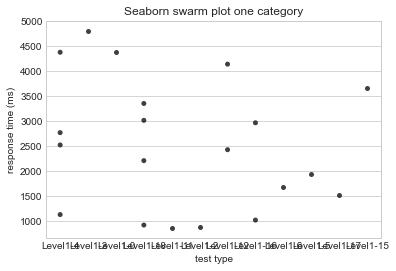

In [56]:
#Swarm Plot - one category
# add swarmplot
if(len(querytime) <= maxScatter):    
    bplot=sns.swarmplot(y='responseMS', x='level1',
                  data=querytime,
                  color='black',
                  alpha=0.75)
    
plt.title("Seaborn swarm plot one category")
plt.suptitle("")
plt.xlabel("test type")
plt.ylabel("response time (ms)")
plt.show()

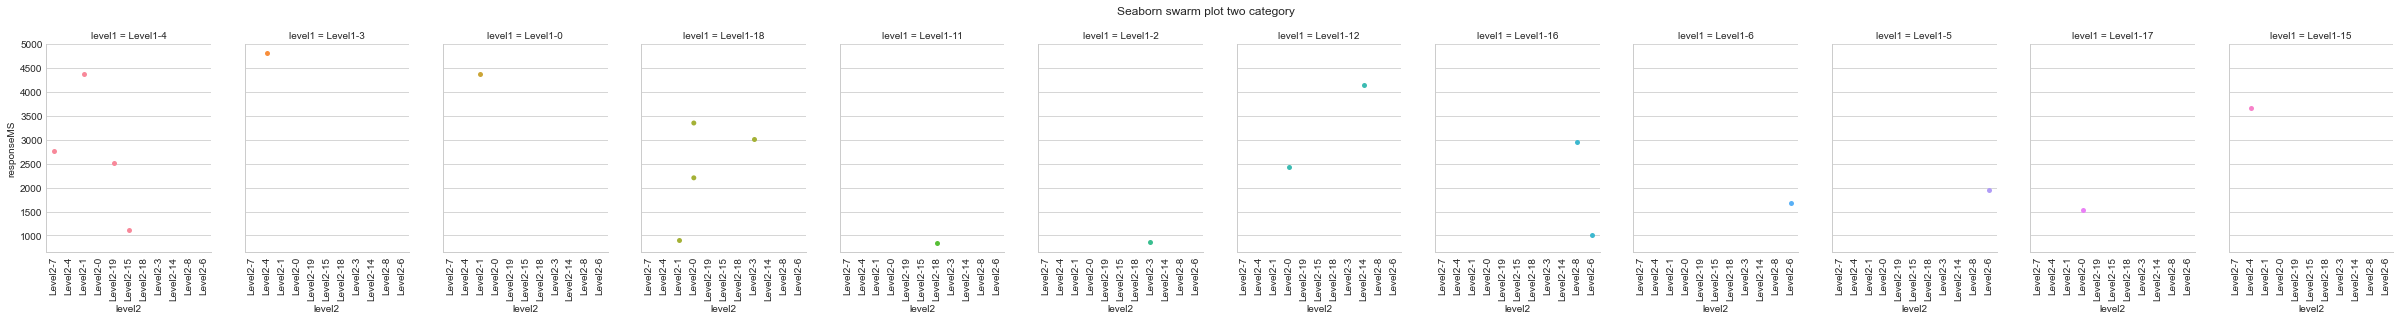

In [57]:
#Swarm plot - two category
if(len(querytime) <= maxScatter):
    g = sns.catplot(x="level2", y="responseMS",
                    hue="level1", col="level1",
                    data=querytime, kind="swarm",
                    height=4, aspect=.7)
    g.set_xticklabels(rotation=90)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Seaborn swarm plot two category')
plt.subplots_adjust(top=0.85)

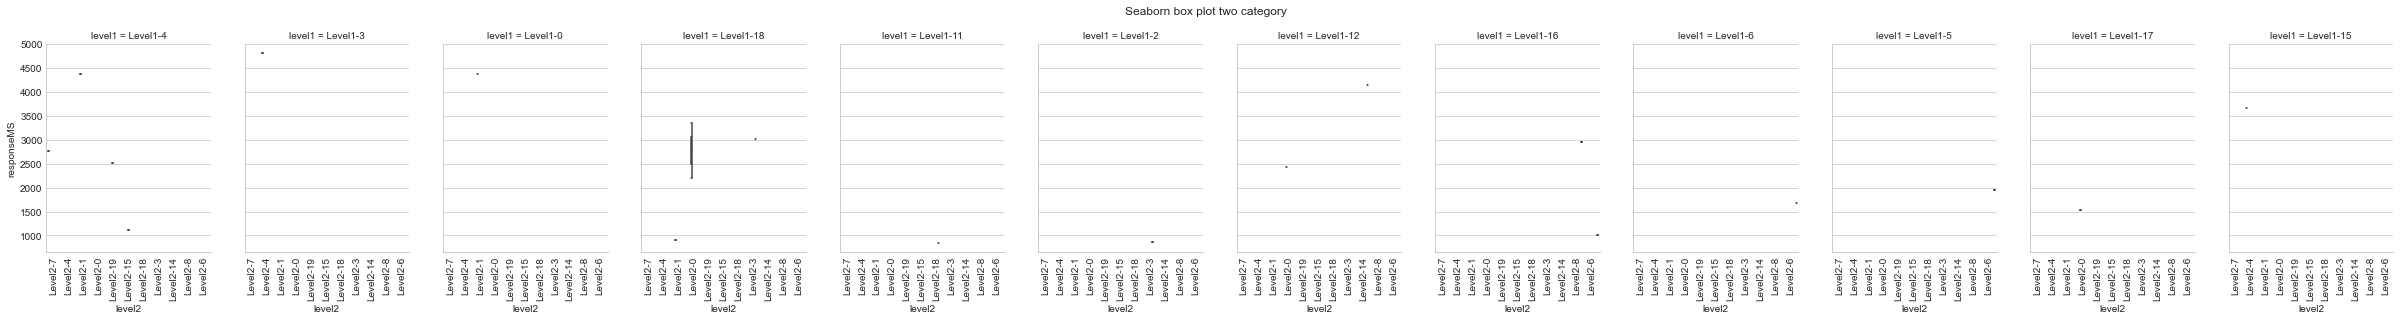

In [58]:
#Box plot - two category
g = sns.catplot(x="level2", y="responseMS",
                hue="level2", col="level1",
                data=querytime, kind="box",
                height=4, aspect=.7)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Seaborn box plot two category')
plt.subplots_adjust(top=0.85)

In [59]:
import folium

In [60]:
m = folium.Map(
    location=[13.0827, 80.1],
    zoom_start=10,
    
)

folium.Marker(
    location=[12.9249, 80.1],
    popup='Tambaram',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[13.0051, 80.1933],
    popup='St. Thomas Mount',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[13.0807, 80.2868],
    popup='St. George Fort',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)


m